In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('sample_data (1).csv')

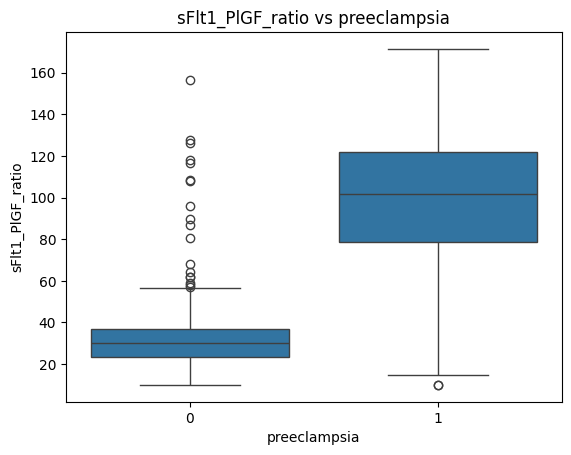

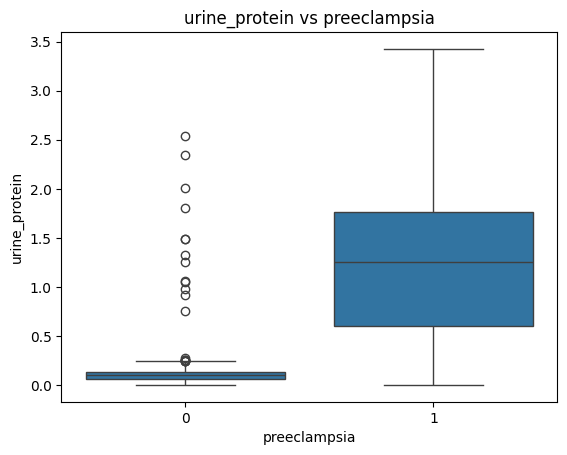

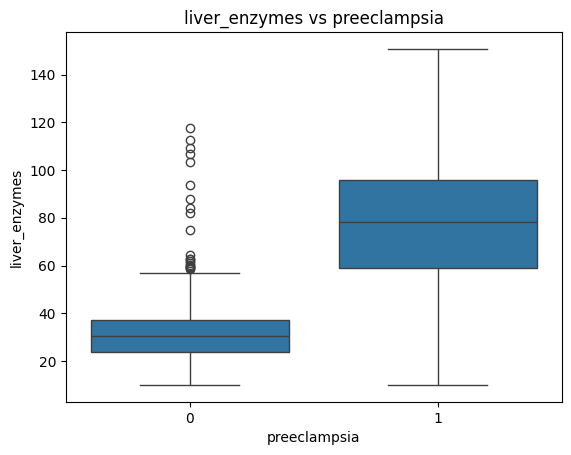

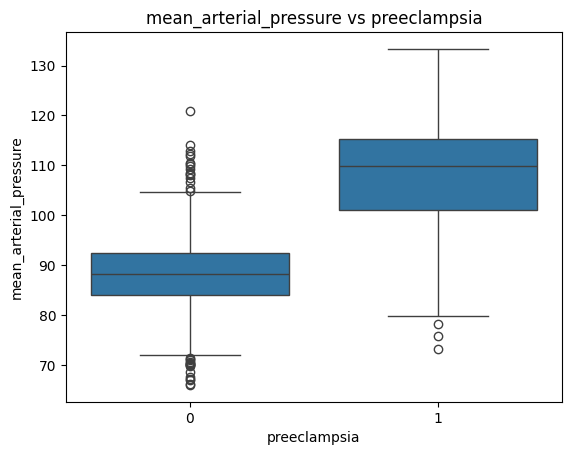

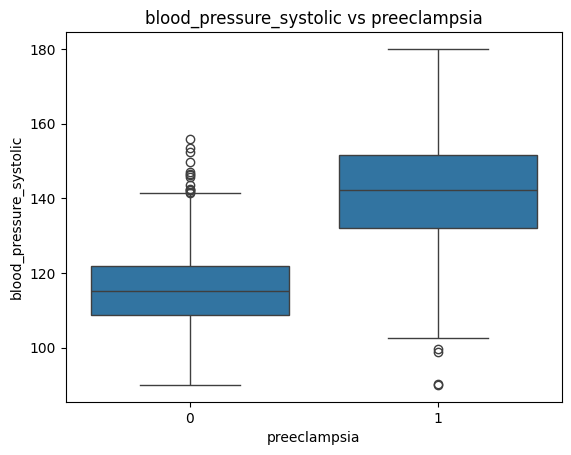

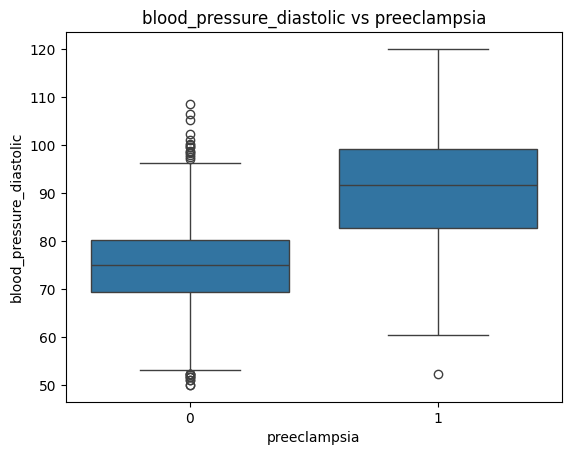

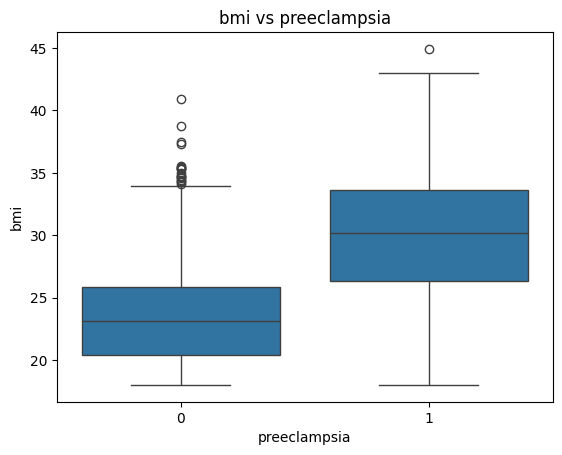

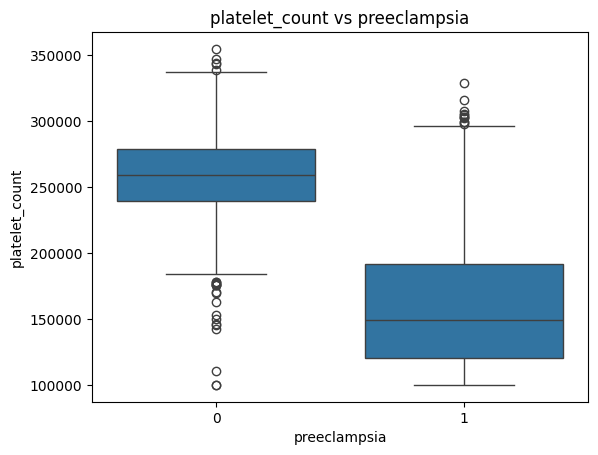

In [18]:
top_features=['sFlt1_PlGF_ratio','urine_protein', 'liver_enzymes', 
              'mean_arterial_pressure', 'blood_pressure_systolic', 
              'blood_pressure_diastolic', 'bmi', 'platelet_count'] 
for feature in top_features:
    sns.boxplot(data=df, x='preeclampsia', y=feature)
    plt.title(f'{feature} vs preeclampsia')
    plt.show()

In [22]:
features_to_scale=['sFlt1_PlGF_ratio',
    'urine_protein', 'liver_enzymes', 'mean_arterial_pressure',
    'serum_creatinine', 'blood_pressure_systolic', 'blood_pressure_diastolic',
    'bmi', 'platelet_count', 'heart_rate', 'respiratory_rate',
    'body_temperature', 'glucose_level', 'hemoglobin', 'age',
    'urine_creatinine', 'white_blood_cell_count', 'red_blood_cell_count',
    'fetal_heart_rate', 'uterine_artery_pi', 'height_cm', 'weight_kg'
]

y=df['preeclampsia']

scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

df_scaled['preeclampsia'] = y.values
df_scaled.head()

,sFlt1_PlGF_ratio,urine_protein,liver_enzymes,mean_arterial_pressure,serum_creatinine,blood_pressure_systolic,blood_pressure_diastolic,bmi,platelet_count,heart_rate,...,hemoglobin,age,urine_creatinine,white_blood_cell_count,red_blood_cell_count,fetal_heart_rate,uterine_artery_pi,height_cm,weight_kg,preeclampsia
0,-0.633377,-0.508383,-1.003624,-0.317854,0.544164,-1.429625,0.509519,0.164485,0.575454,0.340024,...,-0.851073,0.509996,0.258039,0.833813,-1.019666,-0.938768,-0.617082,-1.450265,-0.421503,1
1,0.261857,-0.349132,0.197924,-0.294886,-0.478762,-0.999793,0.252804,-0.382036,1.095178,-1.247269,...,1.528776,0.509996,0.491216,-0.842217,1.314738,-0.367137,-1.253583,0.893930,-1.484910,1
2,-0.399276,-0.425092,-0.548587,0.443610,-0.184063,-0.475392,0.952714,-0.570777,0.726645,2.183190,...,-1.179250,1.304283,-0.123601,0.744634,0.331963,0.872490,0.779222,-0.468473,-0.263813,1
3,1.635306,0.991001,2.171045,2.074804,2.190809,1.720890,1.799660,1.778036,-2.790165,-0.459634,...,-0.059569,0.509996,4.578461,-0.035557,-1.075591,-0.195984,2.029256,-1.422433,1.095576,0
4,-0.436990,-0.260657,-0.502080,0.313287,0.350115,1.184641,-0.351049,-0.730028,0.335064,-2.041025,...,1.389918,-0.284292,-1.115846,1.221891,1.037454,0.195053,0.169082,-0.245072,-0.478507,1


In [23]:
correlations=df_scaled.corr()['preeclampsia'].abs().sort_values(ascending=False)
selected_features=correlations[correlations>0.03].index.tolist()
print("selected features:", selected_features)

selected features: ['preeclampsia', 'sFlt1_PlGF_ratio', 'urine_protein', 'serum_creatinine', 'liver_enzymes', 'platelet_count', 'mean_arterial_pressure', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'bmi', 'weight_kg', 'urine_creatinine', 'uterine_artery_pi', 'hemoglobin', 'fetal_heart_rate', 'heart_rate', 'white_blood_cell_count', 'age', 'red_blood_cell_count', 'body_temperature', 'glucose_level', 'respiratory_rate', 'height_cm']


In [24]:
df_scaled[selected_features].to_csv('data/processed_data.csv', index=False)
print("saved")

saved
